# Tests for NN from scratch

In [1]:
import sys
import os
import importlib
# Add the parent directory (where 'scripts' folder is located) to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'Scripts')))

from NNModel import NeuralNetwork

import numpy as np
import sklearn.datasets  as datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## XOR gate

The most simple test to see if a neural network is working is the XOR gate detailed below.

In [2]:

XOR_Gate = NeuralNetwork()

XOR_Gate.add_input(2)
XOR_Gate.add_dense(2, activation_function="ReLU")
XOR_Gate.add_output(1, activation_function= "")

print(XOR_Gate)


In [ ]:
x = np.array([    [0,0],[0,1],[1,0] ,[1,1]    ])

y = np.array(    [[0],[1],[1],[0]])
XOR_Gate.train(x, y, epoches = 10000, learn_rate= 0.1)

print( XOR_Gate.predict(x) )

(4, 1)


NameError: name 'XOR_Gate' is not defined

## Circular data

Network converged! Training finished
Converged on a training cost of [0.12216043] in 63 epoches


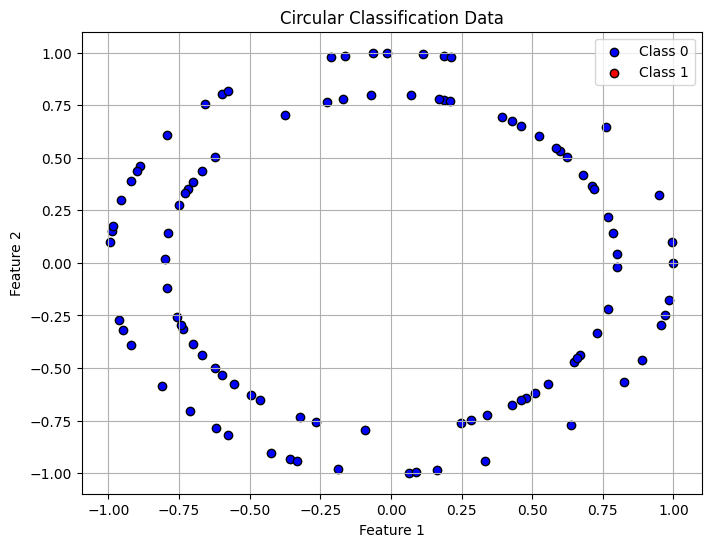

In [ ]:
import NNFunctionUtils
circularX, circulary = datasets.make_circles(n_samples = 500, random_state = 42)

circularX_train, circularX_test, circulary_train, circulary_test = train_test_split(circularX, circulary, random_state = 42, train_size = 0.8)


circularNN = NeuralNetwork()

circularNN.add_input(2)
circularNN.add_dense(5, activation_function= "ReLU")
circularNN.add_dense(5, activation_function= "ReLU")
circularNN.add_dense(10, activation_function= "ReLU")
circularNN.add_output(1)

circularNN.train(circularX_train, circulary_train.reshape(-1, 1), epoches = 100000, learn_rate = 0.01, print_information = True, loss_function="BCEL")

sigmoid = NNFunctionUtils.ActivationFunctions.sigmoid

pred = circularNN.predict(circularX_test)


pred_binary = (pred > 0.5).astype(int)


plt.figure(figsize=(8, 6))
plt.scatter(circularX_test[pred_binary.flatten() == 0][:, 0], circularX_test[pred_binary.flatten() == 0][:, 1], color='blue', label='Class 0', edgecolor='k')
plt.scatter(circularX_test[pred_binary.flatten() == 1][:, 0], circularX_test[pred_binary.flatten() == 1][:, 1], color='red', label='Class 1', edgecolor='k')
plt.title('Circular Classification Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()



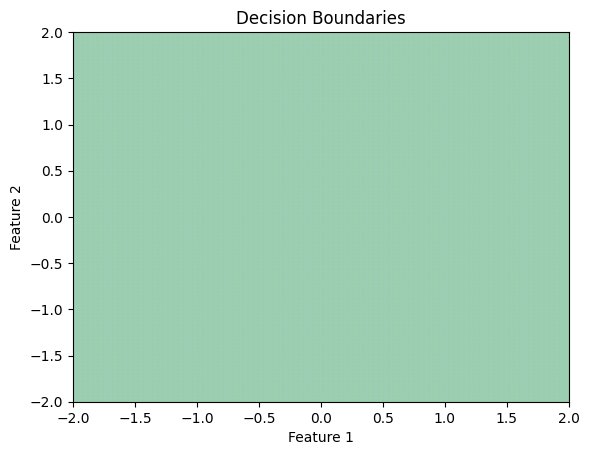

In [16]:
plot_decision_boundry(circularNN)

In [4]:
def plot_decision_boundry(network, x_range=(-2, 2), y_range=(-2, 2), resolution=100):
       x_vals = np.linspace(x_range[0], x_range[1], resolution)
       y_vals = np.linspace(y_range[0], y_range[1], resolution)
       xx, yy = np.meshgrid(x_vals, y_vals)
        
       # Flatten grid for processing
       input_grid = np.c_[xx.ravel(), yy.ravel()]
       
       # Get predictions from the forward function
       output = network.predict(input_grid)  # Forward function should return (N, num_classes)
       sigmoid = NNFunctionUtils.ActivationFunctions.sigmoid



       pred_binary = (sigmoid(output) > 0.5).astype(int)
      
        # Reshape predictions for visualization
       Z = pred_binary.reshape(xx.shape)
        
        # Plot decision boundaries
       plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.Paired)
       plt.scatter(input_grid[:, 0], input_grid[:, 1], c=Z, cmap=plt.cm.Paired, alpha=0.1)
       plt.xlabel("Feature 1")
       plt.ylabel("Feature 2")
       plt.title("Decision Boundaries")
       plt.show()


In [6]:
from NNFunctionUtils import CostFunctions
from NNFunctionUtils import CostFunctionsDerivitives

In [10]:
bcel = CostFunctions.BCEL
bcel_der = CostFunctionsDerivitives.BCEL

In [ ]:
y_pred = np.array([[2.1972], [-1.3863], [1.3863], [-0.4055], [-2.1972]])
y_true = np.array([[1], [0], [1], [0], [0]])
print(bcel(y_pred, y_true))

print(y_pred.shape)
z = np.array([[1.5], -0.7 ,2.0, -1.2]])        
y = np.array([[1,0,1,0]])

print(bcel_der(z, y))

0.23356449221481465
(5, 1)
[[ 0.5 -0.7  1.  -1.2]]
